# KAGRA DRMI

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.1.331         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [4]:
base = finesse.kat()
base.verbose=False
base.parse("""
# clight 299792458.0 

l i1 83.74 0  nL                  #I0=780W
const fmod1 16.880962M            #f1
const fmod2 45.0159M              #f2
const fmod3 56.2699M              #f3

mod eo1 $fmod1 0.2 2 pm 0 nL neo1
s seo1 0 neo1 neo2
mod eo2 $fmod2 0.1 2 pm 0 neo2 neo3
s seo2 0 neo3 neo4
mod eo3 $fmod3 0.05 2 am 0 neo4 neo5

s eo1refl 0 neo5 neo22
bs refl 0.0001 0.9999 0 45 neo22 dump npr nREFL   #REFL
s bsm 0 npr nprb
m prm 0.90 0.10 0 nprb nf0
s Lp1 14.7615 nf0 nf1 #14.7615 
bs PR2 0.9995 500e-6 0 0 nf1 nf2 nPOP dump # not tilted
s Lp2 11.0661 nf2 nf3
bs PR3 1 0 0 0 nf3 nf4 dump dump # not tilted
s Lp3 15.7638 nf4 n1

bs bs1 0.5 0.5 0 45 n1 n2 n3hr n4hr   #BS
s bs1bsAR1 0 n3hr n3hr2
m bsAR1 0 1 0 n3hr2 n3ar
s subBS1 0.0 1.45 n3ar n3ar2 # BS thickness is ignored 
m bsAR3 0 1 0 n3ar2 n3
s bs1bsAR2 0 n4hr n4hr2
m bsAR2 0 1 0 n4hr2 n4ar
s subBS2 0.0 1.45 n4ar n4ar2 # BS thickness is ignored 
m bsAR4 0 1 0 n4ar2 n4

s Lmx 26.6649  n3 n6
s Lmy 23.3351  n2 n5

bs ARx 200e-6 0.9998 0 0.025 n6 nPOX n6ar dump   #wedged ITM
bs ARy 200e-6 0.9998 0 0.025 n5 dump n5ar dump   #wedged ITM

s subx 0.0 1.754 n6ar n6hr # ITM thickness is ignored
s suby 0.0 1.754 n5ar n5hr # ITM thickness is ignored

m ITMx 0.996 4000e-6 90 n6hr dump
m ITMy 0.996 4000e-6 0 n5hr dump

s Ls3 15.7386 n4 nf4s
bs SR3 1 0 0 0.0 nf4s nf3s dump dump # not tilted
s Ls2 11.1115 nf3s nf2s
bs SR2 1 0 0 0.0 nf2s nf1s dump dump # not tilted
s Ls1 14.7412 nf1s n7

m srm 0.85 0.15 0 n7 n8 #phi -0.83
s ssrmAR 0 1.45 n8 nsrmAR1 # srm thickness is ignored
m srmAR 0 1 0 nsrmAR1 nsrmAR2


attr ITMx Rc -1900 % no error
attr ITMy Rc -1900 % no error
attr ARx Rc 0
attr ARy Rc 0
attr prm Rc -458.1285
attr PR2 Rc -3.0764
attr PR3 Rc 24.9165
attr srm Rc  458.1285
attr SR2 Rc -2.9872
attr SR3 Rc 24.9165

cav prcN prm nf0 ITMx n6hr
cav srcN srm n7 ITMy n5hr
maxtem 0

pd1 REFL45I 45.0159M 0 nREFL
pd1 REFL17Q 16.880962M 90 nREFL
pd1 REFL17I 16.880962M 0 nREFL
pd1 AS17I 16.880962M 0 n7*
pd1 AS17Q 16.880962M 90 n7*

pd1 POP17I 16.880962M 0 nPOP
pd1 POP45I 45.0159M 0 nPOP
pd1 POP34I 33.761924M 0 nPOP
pd1 POP34Q 33.761924M 90 nPOP

""")
base.maxtem=1

## Field Checks

### Fields in PRC

<function matplotlib.pyplot.show>

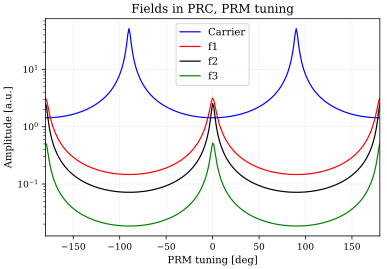

In [5]:
kat0 = base.deepcopy()
kat0.parse("""
ad CRPRC 0 nf0
ad f1PRC 16.880962M nf0
ad f2PRC 45.0159M   nf0
ad f3PRC 56.2699M   nf0
xaxis* prm phi lin -180 180 300
""")

out = kat0.run()
plt.semilogy(out.x, out["CRPRC"],label="Carrier")
plt.semilogy(out.x, out["f1PRC"],label="f1")
plt.semilogy(out.x, out["f2PRC"],label="f2")
plt.semilogy(out.x, out["f3PRC"],label="f3")
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Amplitude [a.u.]")
plt.legend(loc=0)
plt.title('Fields in PRC, PRM tuning')
plt.show

### OK - but is f3 going to resonate in PRC?? 

### Fields in SRC

<function matplotlib.pyplot.show(*args, **kw)>

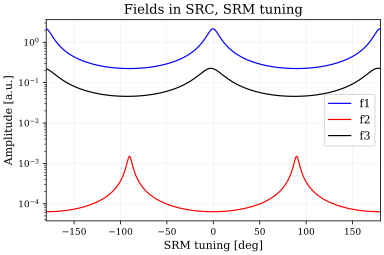

In [155]:
kat0 = base.deepcopy()
kat0.parse("""
ad CRSRC 0 n7*
ad f1SRC 16.880962M n7*
ad f2SRC 45.0159M   n7*
ad f3SRC 56.2699M   n7*
xaxis* srm phi lin -180 180 300
""")

out = kat0.run()
#plt.semilogy(out.x, out["CRSRC"],label="Carrier")
plt.semilogy(out.x, out["f1SRC"],label="f1")
plt.plot(out.x, out["f2SRC"],label="f2")
plt.semilogy(out.x, out["f3SRC"],label="f3")
plt.xlabel("SRM tuning [deg]")
plt.ylabel("Amplitude [a.u.]")
plt.title('Fields in SRC, SRM tuning')
plt.legend(loc=0)
plt.show

### f1, f2 OK, is f3 going into both PRC and SRC so much?

# Sensing Matrix

## Simple Matrix

In [157]:
kat0 = base.deepcopy()
kat0.parse("""
xaxis* prm phi lin 0 0 1
diff prm phi
""")
outP = kat0.run()

kat1 = base.deepcopy()
kat1.parse("""
xaxis* bs1 phi lin 0 0 1
diff bs1 phi
""")
outM = kat1.run()

kat2 = base.deepcopy()
kat2.parse("""
xaxis* srm phi lin 0 0 1
diff srm phi
""")
outS = kat2.run()



print('PRCL')
print(outP["REFL17I"])
print(outP["REFL45I"])
print(outP["AS17I"])
print(outP["AS17Q"])
print(outP["POP17I"])
print(outP["POP45I"])
print(outP["POP34I"])

print('MICH')
print(outM["REFL17I"])
print(outM["REFL45I"])
print(outM["AS17I"])
print(outM["AS17Q"])
print(outM["POP17I"])
print(outM["POP45I"])
print(outM["POP34I"])

print('SRCL')
print(outS["REFL17I"])
print(outS["REFL45I"])
print(outS["AS17I"])
print(outS["AS17Q"])
print(outS["POP17I"])
print(outS["POP45I"])
print(outS["POP34I"])



PRCL
[-0.00065999 -0.00065999]
[-0.00083155 -0.00083155]
[-0.04142972 -0.04142972]
[-0.03686563 -0.03686563]
[0.00062622 0.00062622]
[0.00123574 0.00123574]
[1.47678744e-10 1.47678744e-10]
MICH
[0.00025559 0.00025559]
[0.00058794 0.00058794]
[0.16713846 0.16713846]
[-1.86001468 -1.86001468]
[-0.00018628 -0.00018628]
[-0.00087372 -0.00087372]
[-4.76008122e-11 -4.76008122e-11]
SRCL
[0.00029455 0.00029455]
[4.80243699e-13 4.80243699e-13]
[-0.03195266 -0.03195266]
[0.00581839 0.00581839]
[-0.00023887 -0.00023887]
[-7.50158636e-13 -7.50158636e-13]
[-6.90020957e-11 -6.90020957e-11]


## Matrix with Signal Shapes

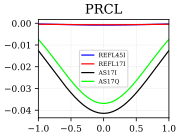

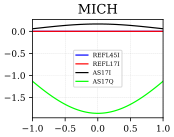

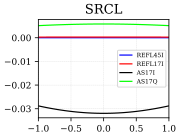

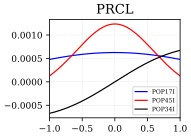

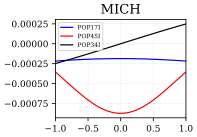

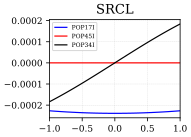

In [149]:
kat0 = base.deepcopy()

kat0.parse("""
xaxis* prm phi lin -1 1 300
diff prm phi
""")

#kat0.noxaxis = True

out = kat0.run()

fig = plt.figure(figsize=(8,4),dpi=200)
ax1 = fig.add_subplot(2,3,1)
ax1.plot(out.x, out["REFL45I"],label='REFL45I')
ax1.plot(out.x, out["REFL17I"],label='REFL17I')
ax1.plot(out.x, out["AS17I"],label='AS17I')
ax1.plot(out.x, out["AS17Q"],label='AS17Q')
ax1.grid(True)
plt.title("PRCL")
plt.legend(loc=0,prop={'size': 6})

#################################

kat101 = base.deepcopy()
kat101.parse("""
xaxis* bs1 phi lin -1 1 100
diff bs1 phi
""")
#kat0.noxaxis = True
out101 = kat101.run()

fig = plt.figure(figsize=(8,4),dpi=200)
ax1 = fig.add_subplot(2,3,2)
ax1.plot(out101.x, out101["REFL45I"],label='REFL45I')
ax1.plot(out101.x, out101["REFL17I"],label='REFL17I')
ax1.plot(out101.x, out101["AS17I"],label='AS17I')
ax1.plot(out101.x, out101["AS17Q"],label='AS17Q')
#ax1.plot(out101.x, out101["POP17I"],label='POP17I')
#ax1.plot(out101.x, out101["POP45I"],label='POP45I')
#ax1.plot(out101.x, out101["POP34I"],label='POP34I')
ax1.grid(True)
plt.title("MICH")
plt.legend(loc=0,prop={'size': 6})


#################################
kat10 = base.deepcopy()
kat10.parse("""
xaxis* srm phi lin -1 1 100
diff srm phi
""")
#kat0.noxaxis = True
out10 = kat10.run()

fig = plt.figure(figsize=(8,4),dpi=200)
ax1 = fig.add_subplot(2,3,3)
ax1.plot(out10.x, out10["REFL45I"],label='REFL45I')
ax1.plot(out10.x, out10["REFL17I"],label='REFL17I')
ax1.plot(out10.x, out10["AS17I"],label='AS17I')
ax1.plot(out10.x, out10["AS17Q"],label='AS17Q')
ax1.grid(True)
plt.title("SRCL")
plt.legend(loc=0,prop={'size': 6})

############# POP PRC ##########
fig = plt.figure(figsize=(8,4),dpi=200)
ax1 = fig.add_subplot(2,3,4)
ax1.plot(out.x, out["POP17I"],label='POP17I')
ax1.plot(out.x, out["POP45I"],label='POP45I')
ax1.plot(out.x, out["POP34I"],label='POP34I')
ax1.grid(True)
plt.title("PRCL")
plt.legend(loc=0,prop={'size': 6})



############# POP MICH ##########
fig = plt.figure(figsize=(8,4),dpi=200)
ax1 = fig.add_subplot(2,3,5)
ax1.plot(out101.x, out101["POP17I"],label='POP17I')
ax1.plot(out101.x, out101["POP45I"],label='POP45I')
ax1.plot(out101.x, out101["POP34I"],label='POP34I')
ax1.grid(True)
plt.title("MICH")
plt.legend(loc=0,prop={'size': 6})

############# POP SRCL ##########
fig = plt.figure(figsize=(8,4),dpi=200)
ax1 = fig.add_subplot(2,3,6)
ax1.plot(out10.x, out10["POP17I"],label='POP17I')
ax1.plot(out10.x, out10["POP45I"],label='POP45I')
ax1.plot(out10.x, out10["POP34I"],label='POP34I')
ax1.grid(True)
plt.title("SRCL")
plt.legend(loc=0,prop={'size': 6})



### Checking if demodulation phases are OK

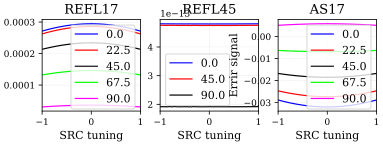

In [150]:
### SRC ###

###### REFL17 ############
kat3 = base.deepcopy()
kat3.REFL17I.remove()
kat3.parse("""
pd1 REFL17I 16.880962M 0 nREFL
xaxis srm phi lin -1 1 100
diff srm phi""")
plt.subplot(2,3,1)

for pp in np.linspace(0,90,5):
    kat3.REFL17I.phase1 = pp
    out=kat3.run()
    plt.plot(out.x, out["REFL17I"],label=pp)
    
    
plt.title("REFL17")
plt.xlabel("SRC tuning")
plt.ylabel("")
plt.legend()

# 0 degrees!

###### REFL45 ############
kat4 = base.deepcopy()
kat4.REFL45I.remove()
kat4.parse("""
pd1 REFL45I 45.0159M 0 nREFL
xaxis srm phi lin -1 1 100
diff srm phi""")
plt.subplot(2,3,2)
for pp in np.linspace(0,90,3):
    kat4.REFL45I.phase1 = pp
    out=kat4.run()
    plt.plot(out.x, out["REFL45I"],label=pp)
    
    
plt.title("REFL45")
plt.xlabel("SRC tuning")
plt.ylabel("")
plt.legend()

# No signal!

###### AS17 ############
kat5 = base.deepcopy()
kat5.AS17Q.remove()
kat5.parse("""
pd1 AS17Q 16.880962M 0 n7*
xaxis* srm phi lin -1 1 100
diff srm phi""")
plt.subplot(2,3,3)
for pp in np.linspace(0,90,5):
    kat5.AS17Q.phase1 = pp
    out=kat5.run()
    plt.plot(out.x, out["AS17Q"],label=pp)
    
    
plt.title("AS17")
plt.xlabel("SRC tuning")
plt.ylabel("Errir signal")
plt.legend()

# 0 degrees!



In [52]:
### PRCL

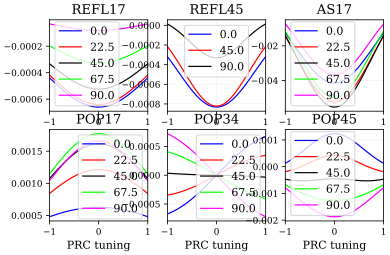

In [151]:
###### REFL17 ############
kat3 = base.deepcopy()
kat3.REFL17I.remove()
kat3.parse("""
pd1 REFL17I 16.880962M 0 nREFL
xaxis prm phi lin -1 1 100
diff prm phi""")
plt.subplot(2,3,1)

for pp in np.linspace(0,90,5):
    kat3.REFL17I.phase1 = pp
    out=kat3.run()
    plt.plot(out.x, out["REFL17I"],label=pp)
    
    
plt.title("REFL17")
plt.xlabel("PRM tuning")
plt.ylabel("")
plt.legend()

# 0 degrees!

###### REFL45 ############
kat4 = base.deepcopy()
kat4.REFL45I.remove()
kat4.parse("""
pd1 REFL45I 45.0159M 0 nREFL
xaxis prm phi lin -1 1 100
diff prm phi""")
plt.subplot(2,3,2)
for pp in np.linspace(0,90,3):
    kat4.REFL45I.phase1 = pp
    out=kat4.run()
    plt.plot(out.x, out["REFL45I"],label=pp)
    
    
plt.title("REFL45")
plt.xlabel("SRC tuning")
plt.ylabel("")
plt.legend()

# 0 degrees!

###### AS17 ############
kat6 = base.deepcopy()
kat6.AS17Q.remove()
kat6.parse("""
pd1 AS17Q 16.880962M 0 n7*
xaxis prm phi lin -1 1 100
diff prm phi""")
plt.subplot(2,3,3)

for pp in np.linspace(0,90,5):
    kat6.AS17Q.phase1 = pp
    out=kat6.run()
    plt.plot(out.x, out["AS17Q"],label=pp)
    
    
plt.title("AS17")
plt.xlabel("PRM tuning")
plt.ylabel("")
plt.legend()

# No signal!

###### POP17 ############
kat5 = base.deepcopy()
kat5.POP17I.remove()
kat5.parse("""
pd1 POP17I 16.880962M 0 nPOP
xaxis prm phi lin -1 1 100
diff prm phi""")
plt.subplot(2,3,4)
for pp in np.linspace(0,90,5):
    kat5.POP17I.phase1 = pp
    out=kat5.run()
    plt.plot(out.x, out["POP17I"],label=pp)
    
    
plt.title("POP17")
plt.xlabel("PRC tuning")
plt.legend()

###### POP34 ############
kat8 = base.deepcopy()
kat8.POP34I.remove()
kat8.parse("""
pd1 POP34I 33.761924M 0 nPOP
xaxis prm phi lin -1 1 100
diff prm phi""")
plt.subplot(2,3,5)
for pp in np.linspace(0,90,5):
    kat8.POP34I.phase1 = pp
    out=kat8.run()
    plt.plot(out.x, out["POP34I"],label=pp)
    
    
plt.title("POP34")
plt.xlabel("PRC tuning")
plt.legend()


###### POP45 ############
kat9 = base.deepcopy()
kat9.POP45I.remove()
kat9.parse("""
pd1 POP45I 45.0159M 0 nPOP
xaxis prm phi lin -1 1 100
diff prm phi""")
plt.subplot(2,3,6)
for pp in np.linspace(0,90,5):
    kat9.POP45I.phase1 = pp
    out=kat9.run()
    plt.plot(out.x, out["POP45I"],label=pp)
    
    
plt.title("POP45")
plt.xlabel("PRC tuning")
plt.legend()


In [98]:
### MICH

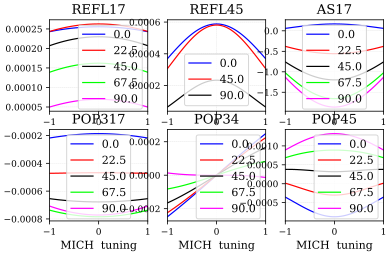

In [152]:
###### REFL17 ############
kat3 = base.deepcopy()
kat3.REFL17I.remove()
kat3.parse("""
pd1 REFL17I 16.880962M 0 nREFL
xaxis bs1 phi lin -1 1 100
diff bs1 phi""")
plt.subplot(2,3,1)

for pp in np.linspace(0,90,5):
    kat3.REFL17I.phase1 = pp
    out=kat3.run()
    plt.plot(out.x, out["REFL17I"],label=pp)
    
    
plt.title("REFL17")
plt.xlabel("MICH tuning")
plt.ylabel("")
plt.legend()

# 0 degrees!

###### REFL45 ############
kat4 = base.deepcopy()
kat4.REFL45I.remove()
kat4.parse("""
pd1 REFL45I 45.0159M 0 nREFL
xaxis bs1 phi lin -1 1 100
diff bs1 phi""")
plt.subplot(2,3,2)
for pp in np.linspace(0,90,3):
    kat4.REFL45I.phase1 = pp
    out=kat4.run()
    plt.plot(out.x, out["REFL45I"],label=pp)
    
    
plt.title("REFL45")
plt.xlabel("MICH tuning")
plt.ylabel("")
plt.legend()

# 0 degrees!

###### AS17 ############
kat6 = base.deepcopy()
kat6.AS17Q.remove()
kat6.parse("""
pd1 AS17Q 16.880962M 90 n7*
xaxis bs1 phi lin -1 1 100
diff bs1 phi""")
plt.subplot(2,3,3)

for pp in np.linspace(0,90,5):
    kat6.AS17Q.phase1 = pp
    out=kat6.run()
    plt.plot(out.x, out["AS17Q"],label=pp)

plt.title("AS17")
plt.xlabel("MICH tuning")
plt.ylabel("")
plt.legend()

# No signal!


###### POP17 ############
kat5 = base.deepcopy()
kat5.POP17I.remove()
kat5.parse("""
pd1 POP17I 16.880962M 0 nPOP
xaxis bs1 phi lin -1 1 100
diff bs1 phi""")
plt.subplot(2,3,4)
for pp in np.linspace(0,90,5):
    kat5.POP17I.phase1 = pp
    out=kat5.run()
    plt.plot(out.x, out["POP17I"],label=pp)
    
    
plt.title("POP317")
plt.xlabel("MICH  tuning")
plt.legend()

###### POP34 ############
kat8 = base.deepcopy()
kat8.POP34I.remove()
kat8.parse("""
pd1 POP34I 33.761924M 0 nPOP
xaxis bs1 phi lin -1 1 100
diff bs1 phi""")
plt.subplot(2,3,5)
for pp in np.linspace(0,90,5):
    kat8.POP34I.phase1 = pp
    out=kat8.run()
    plt.plot(out.x, out["POP34I"],label=pp)
    
    
plt.title("POP34")
plt.xlabel("MICH  tuning")
plt.legend()

###### POP45 ############
kat9 = base.deepcopy()
kat9.POP45I.remove()
kat9.parse("""
pd1 POP45I 45.0159M 0 nPOP
xaxis bs1 phi lin -1 1 100
diff bs1 phi""")
plt.subplot(2,3,6)
for pp in np.linspace(0,90,5):
    kat9.POP45I.phase1 = pp
    out=kat9.run()
    plt.plot(out.x, out["POP45I"],label=pp)

plt.title("POP45")
plt.xlabel("MICH  tuning")
plt.legend()



PRCL
REFL17 - 0 deg
REFL45 - 0 deg
AS17 - no signal

MICH
REFL17 - 22.5 (or 0)
REFL45 - 0
AS17 - 90

SRCL
REFL17 - 0 deg
REFL45 - no signal
AS17 - no signal